In [1]:
%matplotlib widget

In [2]:
from nav_projection import *
from utils import *
from pacti_instrumentation.cpu_usage_plot import cpu_usage_plot

In [3]:
mu=0.005 
gain=(0.2, 0.3)
max_dv=10
me=(0.9, 1.1)
variables=["t", "trtd", "ttid"]
iterations=40
tactics_order=[5,4,1,2,3]

In [4]:
ns = NAVScenarioLinear(iterations=iterations, mu=mu, gain=gain, max_dv=max_dv, me=me, variables=variables, tactics_order=tactics_order)

fixed input contract: 22 vars, 37 constraints; density=0.09705; size distribution: [(3, 12), (2, 18), (1, 7)]
0: shift: 0.004 compose: 0.130 variable size input: 41 vars, 72 constraints; result: 60 vars, 107 constraints; density=0.03629; size distribution: [(3, 36), (2, 54), (1, 17)]
[[(5, 0.010159015655517578, 1), (5, 0.009470939636230469, 1)], [], [], []]
1: shift: 0.008 compose: 0.189 variable size input: 60 vars, 107 constraints; result: 79 vars, 141 constraints; density=0.02774; size distribution: [(3, 48), (2, 72), (1, 21)]
[[(5, 0.010373592376708984, 1), (5, 0.01026606559753418, 1)], [], [], []]
2: shift: 0.013 compose: 0.240 variable size input: 79 vars, 141 constraints; result: 98 vars, 175 constraints; density=0.02245; size distribution: [(3, 60), (2, 90), (1, 25)]
[[(5, 0.011525630950927734, 1), (5, 0.010284185409545898, 1)], [], [], []]
3: shift: 0.019 compose: 0.307 variable size input: 98 vars, 175 constraints; result: 117 vars, 209 constraints; density=0.01885; size dist

In [5]:
import matplotlib.pyplot as plt
indices, contracts, _, compose_times, tactics = zip(*ns.contracts)

# Generate the x values (the indices of the tuples)
indices = range(len(ns.contracts))

variable_counts = [len(c.vars) for c in contracts]
constraint_counts = [len(c.a.terms) + len(c.g.terms) for c in contracts]


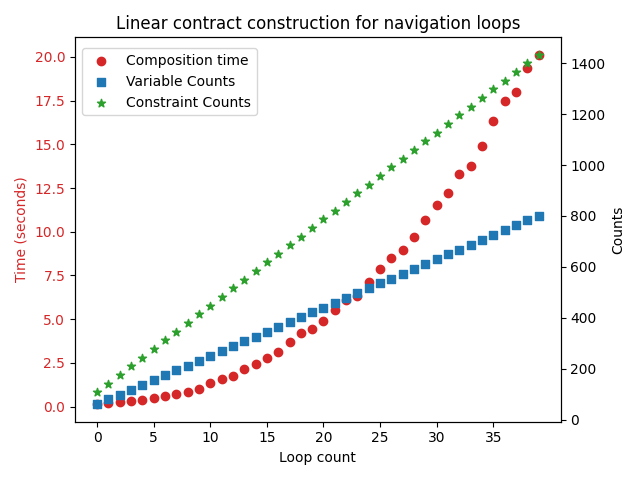

In [15]:
# Create a new figure and a subplot
fig, ax1 = plt.subplots()

ax1.set_title('Linear contract construction for navigation loops')
# Setting x-ticks to multiples of 5
ax1.set_xticks(range(0, len(compose_times), 5))

# Plotting the times_in_seconds on the left y-axis
ax1.set_xlabel('Loop count')
ax1.set_ylabel('Time (seconds)', color='tab:red')
ax1.scatter(range(len(compose_times)), compose_times, color='tab:red', label='Composition time', marker='o')
ax1.tick_params(axis='y', labelcolor='tab:red')

# Create a second y-axis for variable_counts and constraint_counts
ax2 = ax1.twinx()

# We already handled the x-label with ax1
ax2.set_ylabel('Counts', color='black')
ax2.scatter(range(len(variable_counts)), variable_counts, color='tab:blue', label='Variable Counts', marker='s')
ax2.scatter(range(len(constraint_counts)), constraint_counts, color='tab:green', label='Constraint Counts', marker='*')

ax2.tick_params(axis='y', labelcolor='black')

# Get the legend handles and labels for both axes
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()

# Create a single legend with all handles and labels
ax2.legend(handles1 + handles2, labels1 + labels2, loc='upper left', bbox_to_anchor=(0.0, 0.99))


fig.tight_layout()  # To ensure that the right y-label is not clipped
fig.savefig('nav-linear-construction.pgf', format='pgf', bbox_inches='tight')
plt.show()




In [7]:
tactics

([[(5, 0.010159015655517578, 1), (5, 0.009470939636230469, 1)], [], [], []],
 [[(5, 0.010373592376708984, 1), (5, 0.01026606559753418, 1)], [], [], []],
 [[(5, 0.011525630950927734, 1), (5, 0.010284185409545898, 1)], [], [], []],
 [[(5, 0.010940074920654297, 1), (5, 0.009847402572631836, 1)], [], [], []],
 [[(5, 0.011344194412231445, 1), (5, 0.01045680046081543, 1)], [], [], []],
 [[(5, 0.011937141418457031, 1), (5, 0.01073455810546875, 1)], [], [], []],
 [[(5, 0.012486457824707031, 1), (5, 0.011240959167480469, 1)], [], [], []],
 [[(5, 0.01288604736328125, 1), (5, 0.011767387390136719, 1)], [], [], []],
 [[(5, 0.013597249984741211, 1), (5, 0.01202249526977539, 1)], [], [], []],
 [[(5, 0.014153242111206055, 1), (5, 0.012805700302124023, 1)], [], [], []],
 [[(5, 0.015107154846191406, 1), (5, 0.014406204223632812, 1)], [], [], []],
 [[(5, 0.016292810440063477, 1), (5, 0.014610767364501953, 1)], [], [], []],
 [[(5, 0.01709151268005371, 1), (5, 0.01593184471130371, 1)], [], [], []],
 [[(5,